# Task 1: Data Preparation and Analysis


## Task 1.1


In [2]:
import pandas as pd

In [3]:
filename = 'A2data.csv'

In [4]:
col_names = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",  
             "total sulfur dioxide","density","pH","sulphates","alcohol","quality"]

In [5]:
# Reading the CSV file. Delimiter set to ';'

alcohol_df = pd.read_csv(filename, sep = ';', header = None, skiprows = 1, names = col_names, skipinitialspace = True)

In [6]:
alcohol_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
alcohol_df.shape

(4781, 12)

In [8]:
# Dropping duplicate data.

alcohol_df = alcohol_df.drop_duplicates()

In [9]:
alcohol_df.shape

(3875, 12)

In [10]:
alcohol_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [11]:
# Checking for null values
print("Number of nulls in each column\n")
alcohol_df.isnull().sum()

Number of nulls in each column



fixed acidity           0
volatile acidity        1
citric acid             5
residual sugar          7
chlorides               1
free sulfur dioxide     3
total sulfur dioxide    4
density                 7
pH                      1
sulphates               2
alcohol                 0
quality                 0
dtype: int64

In [12]:
alcohol_df.mean()

fixed acidity             6.846568
volatile acidity          0.280177
citric acid               0.334886
residual sugar            5.935832
chlorides                 0.045935
free sulfur dioxide      34.866606
total sulfur dioxide    137.341901
density                   0.993815
pH                        3.195896
sulphates                 0.489933
alcohol                  10.581463
quality                   5.854452
dtype: float64

In [13]:
# Filling the null value in each column with the respective mean.

alcohol_df = alcohol_df.fillna(alcohol_df.mean())

In [14]:
print("Number of nulls in each column\n")
alcohol_df.isnull().sum()

Number of nulls in each column



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
# Collecting a random sample of the dataset, 600 instances.

A2data_sample = alcohol_df.sample(n=600,random_state=3)

In [16]:
A2data_sample.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3420,6.6,0.21,0.29,5.35,0.029,43.0,106.0,0.99112,2.93,0.43,11.5,7
2683,6.7,0.26,0.39,6.40,0.171,64.0,200.0,0.99562,3.19,0.38,9.4,6
1145,7.5,0.14,0.34,1.30,0.055,50.0,153.0,0.99450,3.29,0.80,9.6,6
2303,7.0,0.35,0.17,1.10,0.049,7.0,119.0,0.99297,3.13,0.36,9.7,6
1965,8.1,0.22,0.28,7.70,0.043,57.0,176.0,0.99540,3.12,0.55,10.0,5


In [17]:
print(f"Shape of dataset: {A2data_sample.shape}")
print(f"Number of duplicates: {A2data_sample.duplicated().sum()}")

Shape of dataset: (600, 12)
Number of duplicates: 0


In [18]:
# Saving the cleansed sample onto a new CSV file.

A2data_sample.to_csv('A2RandomSample.csv', index = False)

## Task 1.2


In [19]:
import matplotlib.pyplot as plt

In [20]:
df_alcohol = pd.read_csv('A2RandomSample.csv')

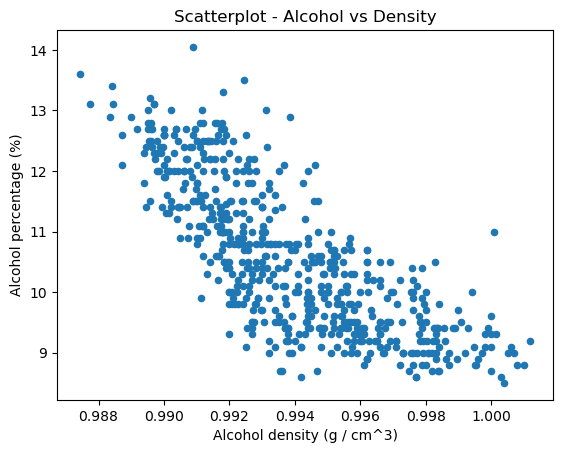

In [21]:
"""
Scatterplot

This plots against two variables:
    Alcohol percentage (X-axis)
    Alcohol density (Y-axis)
    
"""

df_alcohol.plot(kind='scatter', x='density', y='alcohol')
plt.title("Scatterplot - Alcohol vs Density")
plt.ylabel("Alcohol percentage (%)")
plt.xlabel("Alcohol density (g / cm^3)")
plt.show()

In [22]:
# Explore the relationship between two variables: alcohol and density

In [23]:
v = df_alcohol['quality'].unique()
v

array([7, 6, 5, 4, 8, 3])

In [24]:
m1 = df_alcohol['quality'] == v[0]
m2 = df_alcohol['quality'] == v[1]
m3 = df_alcohol['quality'] == v[2]
m4 = df_alcohol['quality'] == v[3]
m5 = df_alcohol['quality'] == v[4]
m6 = df_alcohol['quality'] == v[5]

In [25]:
df_alcohol['quality'].value_counts()

6    256
5    182
7    120
4     23
8     15
3      4
Name: quality, dtype: int64

In [26]:
colours_palette = {v[0]: 'red', v[1] :'blue', v[2]:'green', v[3]:'yellow', v[4]:'purple', v[5]:'orange'}

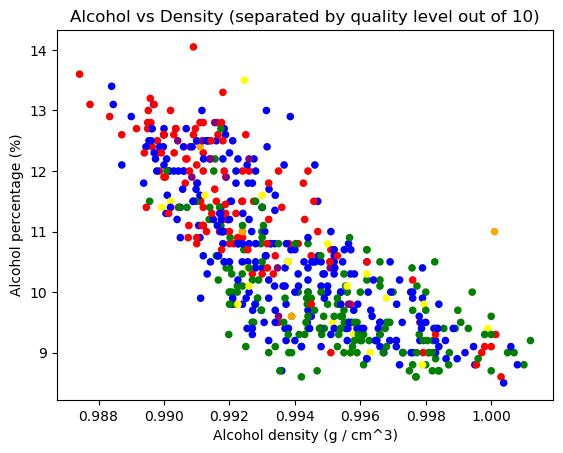

In [27]:
# Assigning colours to each quality label. New insights are found. 
colours = [colours_palette[c] for c in df_alcohol['quality']]
df_alcohol.plot(kind='scatter', x='density', y='alcohol', c = colours)
plt.title("Alcohol vs Density (separated by quality level out of 10)")
plt.ylabel("Alcohol percentage (%)")
plt.xlabel("Alcohol density (g / cm^3)")
plt.show()

In [28]:
x = df_alcohol['density']
y = df_alcohol['alcohol']

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
x = x.values.reshape(-1,1)
y=y.values

In [31]:
linear_model = LinearRegression()

In [32]:
linear_model.fit(x,y)

LinearRegression()

In [33]:
import math

In [34]:
 df_alcohol.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.033674,0.342579,0.076493,-0.041677,-0.087212,0.151425,0.287949,-0.455509,0.044353,-0.105276,-0.148776
volatile acidity,0.033674,1.000000,-0.111649,0.059901,0.024041,-0.077488,0.177522,0.048785,-0.045385,0.092121,0.067588,-0.188851
citric acid,0.342579,-0.111649,1.000000,0.145619,0.112392,0.088424,0.141212,0.221880,-0.253039,0.004981,-0.146684,-0.109593
residual sugar,0.076493,0.059901,0.145619,1.000000,0.041586,0.317481,0.398989,0.814182,-0.190664,0.037463,-0.417051,-0.103351
chlorides,-0.041677,0.024041,0.112392,0.041586,1.000000,0.171100,0.198315,0.212520,-0.045632,-0.025732,-0.336592,-0.172333
free sulfur dioxide,-0.087212,-0.077488,0.088424,0.317481,0.171100,1.000000,0.540609,0.311900,-0.041616,-0.040648,-0.298498,-0.043512
total sulfur dioxide,0.151425,0.177522,0.141212,0.398989,0.198315,0.540609,1.000000,0.533252,-0.071867,0.160154,-0.426804,-0.208324
density,0.287949,0.048785,0.221880,0.814182,0.212520,0.311900,0.533252,1.000000,-0.150939,0.131058,-0.776658,-0.329682
pH,-0.455509,-0.045385,-0.253039,-0.190664,-0.045632,-0.041616,-0.071867,-0.150939,1.000000,0.131902,0.178226,0.188298
sulphates,0.044353,0.092121,0.004981,0.037463,-0.025732,-0.040648,0.160154,0.131058,0.131902,1.000000,-0.014363,0.055990


In [35]:
r2_score = linear_model.score(x, y)
print(f"R-squared value: {r2_score:.3f}")
r_score = math.sqrt(r2_score.round(3))
print(f"Correlation coefficient: -{r_score:.3f}")

R-squared value: 0.603
Correlation coefficient: -0.777


## Task 1.3


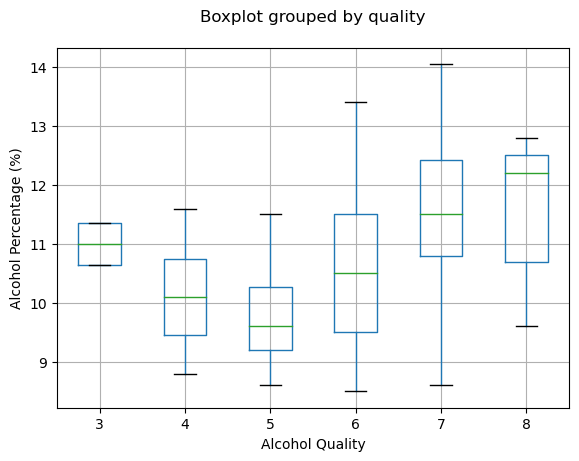

In [36]:
df_alcohol.boxplot(column='alcohol', by='quality', showfliers = False)
plt.title('\n')
plt.ylabel("Alcohol Percentage (%)")
plt.xlabel("Alcohol Quality")
plt.show()

# Task 2: Classification

## Task 2.1 

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

In [38]:
X = df_alcohol.iloc[:, 0:11]

In [39]:
print(X.shape)
X.head()

(600, 11)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.6,0.21,0.29,5.35,0.029,43.0,106.0,0.99112,2.93,0.43,11.5
1,6.7,0.26,0.39,6.40,0.171,64.0,200.0,0.99562,3.19,0.38,9.4
2,7.5,0.14,0.34,1.30,0.055,50.0,153.0,0.99450,3.29,0.80,9.6
3,7.0,0.35,0.17,1.10,0.049,7.0,119.0,0.99297,3.13,0.36,9.7
4,8.1,0.22,0.28,7.70,0.043,57.0,176.0,0.99540,3.12,0.55,10.0


In [40]:
#Standardising the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
# Setting target feature
y = df_alcohol.iloc[:,-1]

In [42]:
print(y.shape)
y.head()

(600,)


0    7
1    6
2    6
3    6
4    5
Name: quality, dtype: int64

In [43]:
#Splitting the dataset into training and testing segments 
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state = 3)

In [44]:
clf_MODEL = KNeighborsClassifier()

In [45]:
# Training the data
clf_MODEL.fit(X_train,y_train)

KNeighborsClassifier()

In [46]:
# Predicting the data
y_predicted_data = clf_MODEL.predict(X_test)

In [47]:
print("Accuracy: " + str(accuracy_score(y_predicted_data, y_test)))

Accuracy: 0.4666666666666667


In [48]:
print(confusion_matrix(y_predicted_data, y_test))

[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  0 21 16  3  0]
 [ 0  1 27 37 10  1]
 [ 0  1  0 16 12  3]
 [ 0  0  0  1  0  0]]


In [49]:
print(classification_report(y_predicted_data, y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.44      0.51      0.47        41
           6       0.53      0.49      0.51        76
           7       0.48      0.38      0.42        32
           8       0.00      0.00      0.00         1

    accuracy                           0.47       150
   macro avg       0.24      0.23      0.23       150
weighted avg       0.49      0.47      0.48       150



/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Task 2.2 

In [50]:
# Evaluating performance for all odd values of k from 3 to 11 *(and 41)

print("--------------------------------------------------------------------------------------")
print(f"KNN Performance when k = 3\n")
clf_MODEL = KNeighborsClassifier(3)
trained_data = clf_MODEL.fit(X_train,y_train)
y_predicted_data = clf_MODEL.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_predicted_data, y_test))+ '\n')
print('\n')
report = classification_report(y_predicted_data, y_test)
print(report)

--------------------------------------------------------------------------------------
KNN Performance when k = 3

Accuracy: 0.36666666666666664



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.33      0.36      0.34        45
           6       0.40      0.42      0.41        67
           7       0.44      0.34      0.39        32
           8       0.00      0.00      0.00         0

    accuracy                           0.37       150
   macro avg       0.20      0.19      0.19       150
weighted avg       0.37      0.37      0.37       150



/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
print("--------------------------------------------------------------------------------------")
print(f"KNN Performance when k = 5\n")
clf_MODEL = KNeighborsClassifier(5)
trained_data = clf_MODEL.fit(X_train,y_train)
y_predicted_data = clf_MODEL.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_predicted_data, y_test))+ '\n')
print('\n')
report = classification_report(y_predicted_data, y_test)
print(report)

--------------------------------------------------------------------------------------
KNN Performance when k = 5

Accuracy: 0.4666666666666667



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.44      0.51      0.47        41
           6       0.53      0.49      0.51        76
           7       0.48      0.38      0.42        32
           8       0.00      0.00      0.00         1

    accuracy                           0.47       150
   macro avg       0.24      0.23      0.23       150
weighted avg       0.49      0.47      0.48       150



/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
print("--------------------------------------------------------------------------------------")
print(f"KNN Performance when k = 7\n")
clf_MODEL = KNeighborsClassifier(7)
trained_data = clf_MODEL.fit(X_train,y_train)
y_predicted_data = clf_MODEL.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_predicted_data, y_test))+ '\n')
print('\n')
report = classification_report(y_predicted_data, y_test)
print(report)

--------------------------------------------------------------------------------------
KNN Performance when k = 7



/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.44



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.42      0.50      0.45        40
           6       0.51      0.46      0.48        79
           7       0.40      0.32      0.36        31
           8       0.00      0.00      0.00         0

    accuracy                           0.44       150
   macro avg       0.22      0.21      0.22       150
weighted avg       0.46      0.44      0.45       150



/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
print("--------------------------------------------------------------------------------------")
print(f"KNN Performance when k = 9\n")
clf_MODEL = KNeighborsClassifier(9)
trained_data = clf_MODEL.fit(X_train,y_train)
y_predicted_data = clf_MODEL.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_predicted_data, y_test))+ '\n')
print('\n')
report = classification_report(y_predicted_data, y_test)
print(report)

--------------------------------------------------------------------------------------
KNN Performance when k = 9

Accuracy: 0.46



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.46      0.52      0.49        42
           6       0.53      0.47      0.50        78
           7       0.40      0.33      0.36        30
           8       0.00      0.00      0.00         0

    accuracy                           0.46       150
   macro avg       0.23      0.22      0.23       150
weighted avg       0.48      0.46      0.47       150



/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
print("--------------------------------------------------------------------------------------")
print(f"KNN Performance when k = 11\n")
clf_MODEL = KNeighborsClassifier(11)
trained_data = clf_MODEL.fit(X_train,y_train)
y_predicted_data = clf_MODEL.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_predicted_data, y_test))+ '\n')
print('\n')
report = classification_report(y_predicted_data, y_test)
print(report)

--------------------------------------------------------------------------------------
KNN Performance when k = 11

Accuracy: 0.4866666666666667



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.52      0.58      0.55        43
           6       0.56      0.50      0.53        78
           7       0.36      0.31      0.33        29
           8       0.00      0.00      0.00         0

    accuracy                           0.49       150
   macro avg       0.24      0.23      0.23       150
weighted avg       0.51      0.49      0.50       150



/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
print("--------------------------------------------------------------------------------------\n")
print(f"KNN Performance when k = 11\n")
clf_MODEL = KNeighborsClassifier(41)
trained_data = clf_MODEL.fit(X_train,y_train)
y_predicted_data = clf_MODEL.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_predicted_data, y_test))+ '\n')
print('\n')
print(classification_report(y_predicted_data, y_test))

--------------------------------------------------------------------------------------

KNN Performance when k = 11

Accuracy: 0.52



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.40      0.58      0.47        33
           6       0.69      0.55      0.61        88
           7       0.44      0.38      0.41        29
           8       0.00      0.00      0.00         0

    accuracy                           0.52       150
   macro avg       0.25      0.25      0.25       150
weighted avg       0.57      0.52      0.54       150



/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Task 2.3 

In [56]:
# Testing KNN with different train/test splits (test_size = 0.2 - 0.8)
print("--------------------------------------------------------------------------------------")

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state = 3)
clf_MODEL = KNeighborsClassifier(41)
trained_data = clf_MODEL.fit(X_train,y_train)
y_predicted_data = clf_MODEL.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_predicted_data, y_test))+ '\n')
print(confusion_matrix(y_predicted_data, y_test))
print('\n')
print(classification_report(y_predicted_data, y_test))

--------------------------------------------------------------------------------------
Accuracy: 0.5083333333333333

[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  1 13  6  3  0]
 [ 0  1 22 38 11  0]
 [ 0  0  2 10 10  2]
 [ 0  0  0  0  0  0]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.35      0.54      0.43        24
           6       0.70      0.53      0.60        72
           7       0.42      0.42      0.42        24
           8       0.00      0.00      0.00         0

    accuracy                           0.51       120
   macro avg       0.25      0.25      0.24       120
weighted avg       0.58      0.51      0.53       120



/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state = 3)
clf_MODEL = KNeighborsClassifier(41)
trained_data = clf_MODEL.fit(X_train,y_train)
y_predicted_data = clf_MODEL.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_predicted_data, y_test))+ '\n')
print(confusion_matrix(y_predicted_data, y_test))
print('\n')
print(classification_report(y_predicted_data, y_test))

Accuracy: 0.5277777777777778

[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  1 24 13  4  0]
 [ 0  1 29 54 16  3]
 [ 0  0  2 13 17  2]
 [ 0  0  0  0  0  0]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.44      0.56      0.49        43
           6       0.68      0.52      0.59       103
           7       0.46      0.50      0.48        34
           8       0.00      0.00      0.00         0

    accuracy                           0.53       180
   macro avg       0.26      0.26      0.26       180
weighted avg       0.58      0.53      0.55       180



/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.4,random_state = 3)
clf_MODEL = KNeighborsClassifier(41)
trained_data = clf_MODEL.fit(X_train,y_train)
y_predicted_data = clf_MODEL.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_predicted_data, y_test))+ '\n')
print(confusion_matrix(y_predicted_data, y_test))
print('\n')
print(classification_report(y_predicted_data, y_test))

Accuracy: 0.4666666666666667

[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  2 23 14  3  0]
 [ 0  4 54 69 20  2]
 [ 0  0  2 22 20  4]
 [ 0  0  0  0  0  0]]




/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.29      0.53      0.38        43
           6       0.66      0.46      0.54       149
           7       0.47      0.42      0.44        48
           8       0.00      0.00      0.00         0

    accuracy                           0.47       240
   macro avg       0.24      0.24      0.23       240
weighted avg       0.55      0.47      0.49       240



/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.5,random_state = 3)
clf_MODEL = KNeighborsClassifier(41)
trained_data = clf_MODEL.fit(X_train,y_train)
y_predicted_data = clf_MODEL.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_predicted_data, y_test))+ '\n')
print(confusion_matrix(y_predicted_data, y_test))
print('\n')
print(classification_report(y_predicted_data, y_test))

Accuracy: 0.5

[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  3 37 25  4  0]
 [ 0  5 51 87 29  5]
 [ 0  0  2 21 26  4]
 [ 0  0  0  0  0  0]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.41      0.53      0.46        70
           6       0.65      0.49      0.56       177
           7       0.44      0.49      0.46        53
           8       0.00      0.00      0.00         0

    accuracy                           0.50       300
   macro avg       0.25      0.25      0.25       300
weighted avg       0.56      0.50      0.52       300



/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.6,random_state = 3)
clf_MODEL = KNeighborsClassifier(41)
trained_data = clf_MODEL.fit(X_train,y_train)
y_predicted_data = clf_MODEL.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_predicted_data, y_test))+ '\n')
print(confusion_matrix(y_predicted_data, y_test))
print('\n')
print(classification_report(y_predicted_data, y_test))

Accuracy: 0.5083333333333333

[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  2   9  45  23   7   1]
 [  0   2  54 100  28   2]
 [  0   1   5  35  38   8]
 [  0   0   0   0   0   0]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.43      0.52      0.47        87
           6       0.63      0.54      0.58       186
           7       0.52      0.44      0.48        87
           8       0.00      0.00      0.00         0

    accuracy                           0.51       360
   macro avg       0.26      0.25      0.25       360
weighted avg       0.56      0.51      0.53       360



/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.7,random_state = 3)
clf_MODEL = KNeighborsClassifier(41)
trained_data = clf_MODEL.fit(X_train,y_train)
y_predicted_data = clf_MODEL.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_predicted_data, y_test))+ '\n')
print(confusion_matrix(y_predicted_data, y_test))
print('\n')
print(classification_report(y_predicted_data, y_test))

Accuracy: 0.5142857142857142

[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  2  10  55  32   9   2]
 [  0   5  60 120  35   3]
 [  1   0   7  31  41   7]
 [  0   0   0   0   0   0]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.45      0.50      0.47       110
           6       0.66      0.54      0.59       223
           7       0.48      0.47      0.48        87
           8       0.00      0.00      0.00         0

    accuracy                           0.51       420
   macro avg       0.26      0.25      0.26       420
weighted avg       0.57      0.51      0.54       420



/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.8,random_state = 3)
clf_MODEL = KNeighborsClassifier(41)
trained_data = clf_MODEL.fit(X_train,y_train)
y_predicted_data = clf_MODEL.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_predicted_data, y_test))+ '\n')
print(confusion_matrix(y_predicted_data, y_test))
print('\n')
print(classification_report(y_predicted_data, y_test))

Accuracy: 0.4375

[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  1   7  31  23   3   1]
 [  2  12 113 176  93  13]
 [  0   0   0   2   3   0]
 [  0   0   0   0   0   0]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.22      0.47      0.30        66
           6       0.88      0.43      0.58       409
           7       0.03      0.60      0.06         5
           8       0.00      0.00      0.00         0

    accuracy                           0.44       480
   macro avg       0.19      0.25      0.15       480
weighted avg       0.78      0.44      0.53       480



/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Task 3: Clustering

## Task 3.1 

In [63]:
#Separating target and feature columns.
X = df_alcohol.iloc[:, 0:11]
y = df_alcohol['quality']

In [64]:
#Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [65]:
# K=Means model run and evaluated
kmeans = KMeans(random_state = 3)
kmeans.fit(X)
X["cluster"] = kmeans.predict(X)
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg:.2f}\n')

Silhouette Score: 0.34



/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [66]:
# K=Means model run and evaluated (n_init increases by 5 for each iteration)
num_iterations = 5
while num_iterations <= 60:
    kmeans = KMeans(n_init = num_iterations, random_state = 3)
    kmeans.fit(X)
    X["cluster"] = kmeans.predict(X)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    print(f'Silhouette Score when n_init = {num_iterations}: {silhouette_avg:.2f}\n')
    X = df_alcohol.iloc[:, 0:11]
    num_iterations += 5

Silhouette Score when n_init = 5: 0.33

Silhouette Score when n_init = 10: 0.34

Silhouette Score when n_init = 15: 0.34

Silhouette Score when n_init = 20: 0.34

Silhouette Score when n_init = 25: 0.34

Silhouette Score when n_init = 30: 0.33

Silhouette Score when n_init = 35: 0.33

Silhouette Score when n_init = 40: 0.33

Silhouette Score when n_init = 45: 0.33

Silhouette Score when n_init = 50: 0.33

Silhouette Score when n_init = 55: 0.33

Silhouette Score when n_init = 60: 0.33



In [67]:
# K-Means modelling
X = df_alcohol.iloc[:, 0:11]
# Create model
kmeans = KMeans(random_state = 3)
# Train model with dataset
kmeans.fit(X)
# Use model to predict which cluster it belongs to
X["cluster"] = kmeans.predict(X)
# Model scoring
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg:.2f}\n')
# Generating classification report. 
# Shows the clusters with a count of all the quality labels within each cluster. 
X['Target'] = y
X['c'] = 'Look at me, I\'m important'
classification_report = X[['cluster','Target','c']].groupby(['cluster','Target']).agg('count')
print(classification_report)
print('\n')

/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.34

                 c
cluster Target    
0       3        1
        4        6
        5       12
        6       25
        7       16
        8        2
1       4        2
        5       29
        6       58
        7       36
2       4        3
        5       34
        6       19
        7        6
3       3        1
        4        7
        5       37
        6       69
        7       38
        8        8
4       3        2
5       4        1
        5       17
        6       11
        7        1
6       4        2
        5       26
        6       35
        7       11
        8        2
7       4        2
        5       27
        6       39
        7       12
        8        3




## Task 3.2 

In [68]:
#Plotting the sum of square distances (inertia) to K centroids against K (number of clusters)
#For each increment of k, model has to be run and it's inertia will be stored in an array
squreDistSum = []
for k in range(1, 11):
    X = df_alcohol.iloc[:, 0:11]
    kmeans = KMeans(n_clusters=k, random_state=3, n_init = 10)
    kmeans.fit(X)
    squreDistSum.append(kmeans.inertia_)

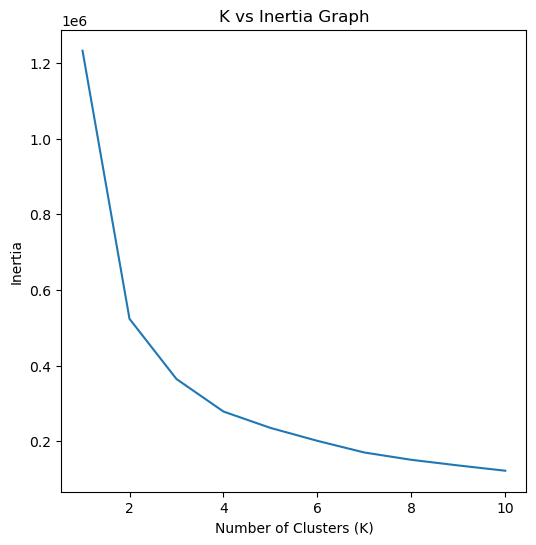

In [69]:
# Actual plotting of inertia against number of clusters 
plt.figure(figsize=(6, 6))
plt.plot(range(1, 11), squreDistSum)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('K vs Inertia Graph')
plt.show()

In [70]:
# K=Means model run and evaluated (K increases by 1 for each iteration)
# Silhouette score used for evaluation
for k in range(2, 11):
    X = df_alcohol.iloc[:, 0:11]
    kmeans = KMeans(n_clusters=k, random_state=3, n_init = 'auto')
    kmeans.fit(X)
    X["cluster"] = kmeans.predict(X)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    print(f'Silhouette score when k (number of clusters) is {k} = {silhouette_avg:.2f}\n')


Silhouette score when k (number of clusters) is 2 = 0.50

Silhouette score when k (number of clusters) is 3 = 0.41

Silhouette score when k (number of clusters) is 4 = 0.39

Silhouette score when k (number of clusters) is 5 = 0.37

Silhouette score when k (number of clusters) is 6 = 0.36

Silhouette score when k (number of clusters) is 7 = 0.35

Silhouette score when k (number of clusters) is 8 = 0.33

Silhouette score when k (number of clusters) is 9 = 0.33

Silhouette score when k (number of clusters) is 10 = 0.33



In [71]:
X = df_alcohol.iloc[:, 0:11]
kmeans = KMeans(n_clusters = 2,random_state = 3)
kmeans.fit(X)
X["cluster"] = kmeans.predict(X)
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg:.2f}\n')
# Generating classification report
X['Target'] = y
X['c'] = 'Look at me, I\'m important'
classification_report = X[['cluster','Target','c']].groupby(['cluster','Target']).agg('count')
print(classification_report)
print('\n')

Silhouette Score: 0.50

                  c
cluster Target     
0       3         2
        4         7
        5       109
        6       110
        7        33
        8         5
1       3         2
        4        16
        5        73
        6       146
        7        87
        8        10




/Users/issaczerihun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Task 3.3 

In [72]:
# Running algorithm
X = df_alcohol.iloc[:, 0:11]
kmeans = KMeans(n_clusters=2, random_state=3, n_init = 10)
kmeans.fit(X)
X["cluster"] = kmeans.predict(X)
X['Target'] = y
X['count'] = 'Look at me, I\'m important'
classification_report = X[['cluster','Target','count']].groupby(['cluster','Target']).agg('count')
print(classification_report)
print('\n')

                count
cluster Target       
0       3           2
        4           7
        5         109
        6         110
        7          33
        8           5
1       3           2
        4          16
        5          73
        6         146
        7          87
        8          10




In [73]:
# Generating confusion matrix
predict = X["cluster"]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,predict)
print(cm)

[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  2   2   0   0   0   0   0   0]
 [  7  16   0   0   0   0   0   0]
 [109  73   0   0   0   0   0   0]
 [110 146   0   0   0   0   0   0]
 [ 33  87   0   0   0   0   0   0]
 [  5  10   0   0   0   0   0   0]]


In [74]:
# Formatting confusion matrix
cm = cm[2:,:2]
print(cm)

[[  2   2]
 [  7  16]
 [109  73]
 [110 146]
 [ 33  87]
 [  5  10]]


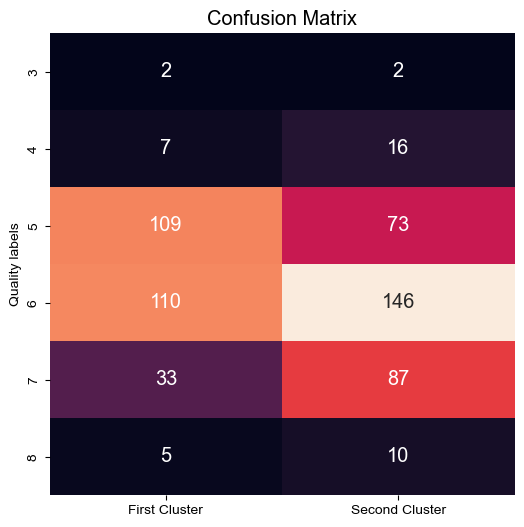

In [75]:
# Further formatting confusion matrix
import seaborn as sns
plt.figure(figsize=(6,6))
plt.xlabel('Clusters')
sns.set(font_scale=1.2)
plt.title("Confusion Matrix",fontweight=60)
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
           xticklabels=['First Cluster','Second Cluster'],
           yticklabels=[3,4,5,6,7,8])
plt.ylabel('Quality labels')
plt.show()